In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = r"C:\Users\prana\Desktop\Data Science\NLP\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [9]:
df.shape

(7043, 20)

In [10]:
df['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [11]:
df1 = df[pd.notna(df['TotalCharges'])]
df1


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:
df1.shape

(7032, 20)

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

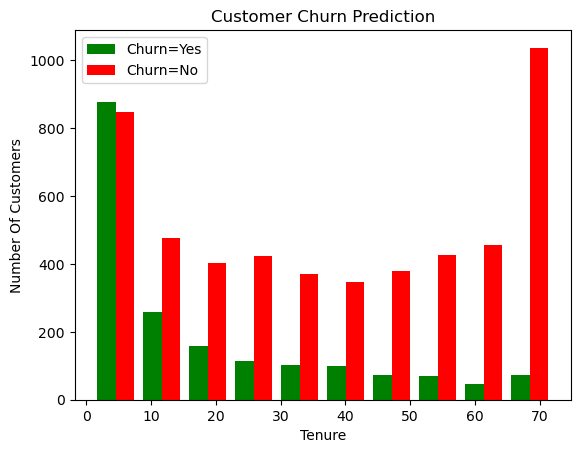

In [23]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction")

plt.hist([tenure_churn_yes,tenure_churn_no],
         color=['green','red'],
         label=['Churn=Yes','Churn=No'])
plt.legend()

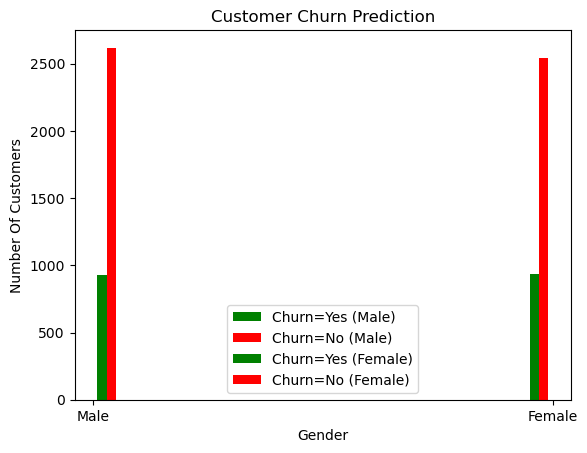

In [35]:
gender_churn_no_male = df1[(df1['Churn'] == 'No') & (df1['gender'] == 'Male')]['gender']
gender_churn_yes_male = df1[(df1['Churn'] == 'Yes') & (df1['gender'] == 'Male')]['gender']

gender_churn_no_female = df1[(df1['Churn'] == 'No') & (df1['gender'] == 'Female')]['gender']
gender_churn_yes_female = df1[(df1['Churn'] == 'Yes') & (df1['gender'] == 'Female')]['gender']

plt.xlabel("Gender")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction")

plt.hist([gender_churn_yes_male, gender_churn_no_male, gender_churn_yes_female, gender_churn_no_female],
         color=['green', 'red','green', 'red'],
         label=['Churn=Yes (Male)', 'Churn=No (Male)', 'Churn=Yes (Female)', 'Churn=No (Female)'])
plt.legend()
plt.show()


In [41]:
def print_unique_col(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column}: {df[column].unique()}')

In [42]:
print_unique_col(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [43]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\prana\AppData\Local\Temp\ipykernel_26308\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\prana\AppData\Local\Temp\ipykernel_26308\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [44]:
print_unique_col(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [45]:
df1.replace({'Yes': 1,'No': 0},inplace=True)


C:\Users\prana\AppData\Local\Temp\ipykernel_26308\1768927586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({'Yes': 1,'No': 0},inplace=True)


In [50]:
for column in df1:
            print(f'{column}: {df1[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [52]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [51]:
df1['gender'].replace({"Female":1,"Male":0},inplace=True)

C:\Users\prana\AppData\Local\Temp\ipykernel_26308\3128987995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({"Female":1,"Male":0},inplace=True)


In [56]:
encoded_df = pd.get_dummies(df1, columns=['InternetService','Contract','PaymentMethod'])

# Display the encoded DataFrame
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [59]:
for column in encoded_df:
            print(f'{column}: {encoded_df[column].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_0: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [61]:
encoded_df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [62]:
scale_col = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

encoded_df[scale_col] = scaler.fit_transform(encoded_df[scale_col])
encoded_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [66]:
encoded_df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [67]:
X = encoded_df.drop("Churn",axis=1)
y = encoded_df["Churn"]

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [71]:
X_train.shape

(5625, 26)

In [72]:
X_test.shape

(1407, 26)

In [74]:
import tensorflow as tf
from tensorflow import keras

In [75]:
model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='ReLU'),
    keras.layers.Dense(15,activation='ReLU'),
    keras.layers.Dense(1,activation='sigmoid'),

])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [77]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4083 - accuracy: 0.8107
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8096
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8107
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8116
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4033 - accuracy: 0.8130
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8133
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8114
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4008 - accuracy: 0.8137
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3994 - accuracy: 0.8121
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3997 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3581 - accuracy: 0.8336
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3577 - accuracy: 0.8348
Epoch 83/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3561 - accuracy: 0.8332
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3565 - accuracy: 0.8324
Epoch 85/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3562 - accuracy: 0.8324
Epoch 86/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3550 - accuracy: 0.8316
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3558 - accuracy: 0.8318
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3553 - accuracy: 0.8361
Epoch 89/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3551 - accuracy: 0.8354
Epoch 90/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3544 - accuracy: 

In [78]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 1s 4ms/step - loss: 0.4840 - accuracy: 0.7690


[0.4840276539325714, 0.7690120935440063]

In [80]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 4ms/step


array([[0.3628783 ],
       [0.62376225],
       [0.00755848],
       [0.8307879 ],
       [0.41584137]], dtype=float32)

In [82]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [85]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [86]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [87]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       999
           1       0.63      0.49      0.55       408

    accuracy                           0.77      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



In [89]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[882, 117],
       [208, 200]])>

In [91]:
# Access the weights of the model at the last epoch
weights = model.get_weights()

# Extract the weights for each column
column_weights = weights[0]

# Print the weights for each column
for i, weight in enumerate(column_weights):
    print(f"Weight for column {i+1}: {weight}")

Weight for column 1: [ 0.181572    0.4831483  -0.4860548   0.29402432 -0.06056649  0.04617156
 -0.07678881  0.10631424  0.33559874  0.6544      0.29589817 -0.0032466
  0.2849693   0.13237838 -0.48155043  0.31391793  0.16609146  0.15517896
 -0.9305624  -0.16573286  0.46575835  0.28589222  0.1920515   0.25665593
 -1.003464   -0.07103869]
Weight for column 2: [-0.1621399  -0.4011532  -0.08069964 -0.7078741   0.44230765 -0.36243138
  0.49064666 -0.02089795 -0.16276142 -0.14340356  0.17006901 -0.2722616
  0.32122844  0.0084687  -0.1535783  -0.48351884  0.03504264  0.25531352
 -0.7251339  -0.31811327  0.06043177  0.2151469   0.12908171  0.29182765
  0.0943355   0.26774636]
Weight for column 3: [ 0.24228363 -0.13352437  0.27483365 -0.05738919  0.5117043  -0.349464
  0.1588518   0.45019427  0.17007823 -0.45378217  0.07455312 -0.49413997
  0.2811978  -0.6456603   0.01318203  0.05410932  0.31956887 -0.05274616
 -0.45837024 -0.01169992 -0.23516805  0.29185998 -0.05775954  0.06007003
 -0.82075846 

In [92]:
# Access the weights of the last layer in the last epoch
weights = model.layers[-1].get_weights()[0]

# Print the weights for each column
for i, weight in enumerate(weights):
    print(f"Weight for column {i+1}: {weight}")

Weight for column 1: [-1.1216767]
Weight for column 2: [-0.3870395]
Weight for column 3: [-0.3159669]
Weight for column 4: [-0.06641051]
Weight for column 5: [-0.24035554]
Weight for column 6: [-0.6509375]
Weight for column 7: [0.86875206]
Weight for column 8: [-0.86407465]
Weight for column 9: [-1.307998]
Weight for column 10: [-0.8870021]
Weight for column 11: [-0.5405527]
Weight for column 12: [0.8713928]
Weight for column 13: [1.5178518]
Weight for column 14: [0.94416106]
Weight for column 15: [-0.3911627]


In [93]:
weights = model.get_weights()


In [97]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [112]:
import numpy as np

# Assuming input_columns is a list containing the names of your input columns
input_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', ..., 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# Match the weights to the corresponding columns
column_weights = dict(zip(input_columns, weights))

# Calculate the absolute values of the weights
abs_weights = {column: abs(weight) for column, weight in column_weights.items()}

# Convert the abs_weights dictionary to a NumPy array
weights_array = np.array(list(abs_weights.values()))

# Create a list of (index, weight) tuples
indexed_weights = list(enumerate(weights_array))

# Sort the indexed weights in descending order based on the weight value
sorted_weights = sorted(indexed_weights, key=lambda x: x[1], reverse=True)

# Extract the indices of the sorted weights
sorted_indices = [index for index, _ in sorted_weights]

# Rank the absolute values of the weights in descending order
ranked_weights = {index: rank + 1 for rank, index in enumerate(sorted_indices)}

# Print the ranked weights
for index, rank in ranked_weights.items():
    print(f"Weight at index {index}: Rank {rank}")


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.

# Handling Imbalanced datasets

### Undersampling majority class

In [117]:
#Class counts
count_class_0, count_class_1 = df1.Churn.value_counts()

#Divide by class
df_class_0 = encoded_df[encoded_df["Churn"]==0]
df_class_1 = encoded_df[encoded_df["Churn"]==1]


In [118]:
count_class_0 , count_class_1

(5163, 1869)

In [119]:
df_class_0.shape , df_class_1.shape

((5163, 27), (1869, 27))

In [120]:
#randomly selecting rows
df_class_0.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1342,1,0,0,0,0.098592,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
6158,0,0,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1195,1,1,1,0,0.267606,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
32,1,0,1,1,0.366197,1,0,1,1,1,...,0,1,0,0,1,0,0,0,0,1
2319,0,0,1,1,0.140845,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [122]:
df_class_0.sample(count_class_1).shape

(1869, 27)

In [124]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under,df_class_1])

In [125]:
df_test_under

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3701,1,0,1,1,0.366197,1,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
6247,0,0,0,0,0.830986,1,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
2930,0,0,1,1,0.422535,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2699,1,1,0,0,0.464789,1,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
931,0,0,0,0,0.450704,1,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,0.154930,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
7026,1,0,0,0,0.112676,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
7032,0,1,0,0,0.000000,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
7034,1,0,0,0,0.929577,1,1,1,1,1,...,0,0,1,1,0,0,0,1,0,0


In [127]:
print(df_test_under.Churn.value_counts())

0    1869
1    1869
Name: Churn, dtype: int64


In [128]:
x = df_test_under.drop('Churn',axis = 1)
y = df_test_under['Churn']

In [141]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=15,stratify=y)

In [142]:
x_train.shape,x_test.shape

((2803, 26), (935, 26))

In [143]:
y_train.value_counts()

1    1402
0    1401
Name: Churn, dtype: int64

In [131]:
import tensorflow as tf
from tensorflow import keras

In [134]:
model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='ReLU'),
    keras.layers.Dense(15,activation='ReLU'),
    keras.layers.Dense(1,activation='sigmoid'),

])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [136]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
88/88 [==============================] - 2s 3ms/step - loss: 0.5984 - accuracy: 0.6914
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5196 - accuracy: 0.7578
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4983 - accuracy: 0.7617
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4919 - accuracy: 0.7624
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4852 - accuracy: 0.7710
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.7685
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7720
Epoch 8/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.7745
Epoch 9/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4750 - accuracy: 0.7738
Epoch 10/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.7763
Epoch 11/

88/88 [==============================] - 0s 3ms/step - loss: 0.3994 - accuracy: 0.8113
Epoch 84/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4003 - accuracy: 0.8152
Epoch 85/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3975 - accuracy: 0.8195
Epoch 86/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3972 - accuracy: 0.8195
Epoch 87/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8166
Epoch 88/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3948 - accuracy: 0.8141
Epoch 89/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3970 - accuracy: 0.8166
Epoch 90/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3966 - accuracy: 0.8127
Epoch 91/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3930 - accuracy: 0.8141
Epoch 92/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.8209
Epoch 93/100


In [138]:
model.evaluate(x_test,y_test)

30/30 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7487


[0.5228148102760315, 0.7486631274223328]

In [146]:
yp = model.predict(x_test)
yp[:5]

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

30/30 [==============================] - 0s 2ms/step


In [147]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       468
           1       0.72      0.81      0.76       467

    accuracy                           0.75       935
   macro avg       0.75      0.75      0.75       935
weighted avg       0.75      0.75      0.75       935



In [169]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[333, 135],
       [ 90, 377]])>

### Oversampling

In [149]:
#Class counts
count_class_0, count_class_1 = df1.Churn.value_counts()
count_class_0, count_class_1

(5163, 1869)

In [156]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)

df_test_over = pd.concat([df_class_1_over,df_class_0])

In [157]:
print("Random over-sampling")
print(df_test_over.Churn.value_counts())

Random over-sampling
1    5163
0    5163
Name: Churn, dtype: int64


In [158]:
df_test_over 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5299,1,1,1,0,0.380282,1,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
5458,0,0,0,0,0.084507,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3485,0,0,0,0,0.014085,1,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
505,1,1,0,0,0.267606,1,1,0,1,1,...,0,0,1,1,0,0,0,0,1,0
945,1,0,0,0,0.028169,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1,0,0,0,1.000000,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
7038,0,0,1,1,0.323944,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [159]:
x = df_test_under.drop('Churn',axis = 1)
y = df_test_under['Churn']

In [160]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=15,stratify=y)

In [161]:
x_train.shape,x_test.shape

((2803, 26), (935, 26))

In [162]:
y_train.value_counts()

1    1402
0    1401
Name: Churn, dtype: int64

In [163]:
import tensorflow as tf
from tensorflow import keras

In [164]:
model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='ReLU'),
    keras.layers.Dense(15,activation='ReLU'),
    keras.layers.Dense(1,activation='sigmoid'),

])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [165]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
88/88 [==============================] - 1s 2ms/step - loss: 0.6023 - accuracy: 0.6982
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.7531
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7710
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.7770
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4798 - accuracy: 0.7720
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4761 - accuracy: 0.7720
Epoch 7/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4733 - accuracy: 0.7774
Epoch 8/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7710
Epoch 9/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.7742
Epoch 10/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4673 - accuracy: 0.7763
Epoch 11/

88/88 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8280
Epoch 84/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3904 - accuracy: 0.8198
Epoch 85/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8220
Epoch 86/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8223
Epoch 87/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3851 - accuracy: 0.8238
Epoch 88/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3862 - accuracy: 0.8277
Epoch 89/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8270
Epoch 90/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.8277
Epoch 91/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3819 - accuracy: 0.8288
Epoch 92/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8327
Epoch 93/100


In [166]:
model.evaluate(x_test,y_test)

30/30 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.7594


[0.5195011496543884, 0.759358286857605]

In [167]:
yp = model.predict(x_test)
yp[:5]

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

30/30 [==============================] - 0s 2ms/step


In [168]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       468
           1       0.74      0.81      0.77       467

    accuracy                           0.76       935
   macro avg       0.76      0.76      0.76       935
weighted avg       0.76      0.76      0.76       935



In [170]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[333, 135],
       [ 90, 377]])>

### SMOTE
### Synthetic Minority Over Sampling Technique

In [179]:
x = encoded_df.drop('Churn',axis = 1)
y = encoded_df['Churn']

In [180]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [172]:
from imblearn.over_sampling import SMOTE

In [181]:
smote = SMOTE(sampling_strategy = 'minority')

In [184]:
x_sm,y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [186]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.20,random_state=15,stratify=y_sm)

In [187]:
x_train.shape,x_test.shape

((8260, 26), (2066, 26))

In [188]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [189]:
import tensorflow as tf
from tensorflow import keras

In [190]:
model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='ReLU'),
    keras.layers.Dense(15,activation='ReLU'),
    keras.layers.Dense(1,activation='sigmoid'),

])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [191]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5365 - accuracy: 0.7283
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4718 - accuracy: 0.7748
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4612 - accuracy: 0.7814
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4552 - accuracy: 0.7860
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4488 - accuracy: 0.7902
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4445 - accuracy: 0.7902
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4397 - accuracy: 0.7979
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4366 - accuracy: 0.7970
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4312 - accuracy: 0.7994
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4289 - accura

259/259 [==============================] - 1s 3ms/step - loss: 0.3442 - accuracy: 0.8494
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3466 - accuracy: 0.8476
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3449 - accuracy: 0.8500
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3454 - accuracy: 0.8521
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3438 - accuracy: 0.8485
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3431 - accuracy: 0.8527
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3429 - accuracy: 0.8517
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3416 - accuracy: 0.8470
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3434 - accuracy: 0.8496
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3424 - accuracy: 

In [192]:
model.evaluate(x_test,y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8103


[0.4335366189479828, 0.8102613687515259]

In [193]:
yp = model.predict(x_test)
yp[:5]

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

65/65 [==============================] - 0s 2ms/step


In [194]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1033
           1       0.80      0.83      0.81      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



In [196]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[819, 214],
       [178, 855]])>

### Ensemble

In [197]:
encoded_df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [198]:
x = encoded_df.drop('Churn',axis=1)
y = encoded_df['Churn']

In [200]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [201]:
x_train.shape,x_test.shape

((5625, 26), (1407, 26))

In [202]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [203]:
  4130/1495
    

2.762541806020067

In [205]:
4130/3


1376.6666666666667

In [206]:
df3 = x_train.copy()
df3["Churn"] = y_train

In [207]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]


In [208]:
df3_class0.shape , df3_class1.shape

((4130, 27), (1495, 27))

In [213]:
def get_train_batch(df_majority,df_minority,start,end):
    
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)

    x_train = df_train.drop("Churn",axis=1)
    y_train = df_train.Churn

    return x_train,y_train

In [215]:
x_train,y_train = get_train_batch(df3_class0,df3_class1,0,1495)
x_train.shape

(2990, 26)

In [216]:
def ANN(x_train,y_train,x_test,y_test,loss,weights):
    
    model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='ReLU'),
    keras.layers.Dense(15,activation='ReLU'),
    keras.layers.Dense(1,activation='sigmoid'),

    ])

    model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
    
    if weights == -1:
        model.fit(x_train,y_train,epochs=100)   
    else:
        model.fit(x_train,y_train,epochs=100,class_weight = weights)
        
    print(model.evaluate(x_test,y_test))
    
    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n",classification_report(y_test,y_preds))
    
    return y_preds

In [217]:
y_pred1 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6319 - accuracy: 0.6602
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5165 - accuracy: 0.7592
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5008 - accuracy: 0.7532
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.7659
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.7682
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4863 - accuracy: 0.7699
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.7722
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.7716
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.7753
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.7759
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3855 - accuracy: 0.8221
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3847 - accuracy: 0.8251
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8227
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.8211
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8227
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8271
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8241
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3802 - accuracy: 0.8254
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3789 - accuracy: 0.8224
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3802 - accuracy: 0.8207
Epoch 93/100


In [218]:
x_train,y_train = get_train_batch(df3_class0,df3_class1,1495,2990)

y_pred2 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6315 - accuracy: 0.6365
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5178 - accuracy: 0.7398
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4970 - accuracy: 0.7565
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4889 - accuracy: 0.7602
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.7602
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4810 - accuracy: 0.7682
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.7629
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4749 - accuracy: 0.7669
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4729 - accuracy: 0.7686
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.7712
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 0.8151
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3872 - accuracy: 0.8187
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8194
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8217
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3866 - accuracy: 0.8197
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8181
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3840 - accuracy: 0.8237
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3832 - accuracy: 0.8231
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3824 - accuracy: 0.8221
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3848 - accuracy: 0.8221
Epoch 93/100


In [219]:
x_train,y_train = get_train_batch(df3_class0,df3_class1,2990,4130)

y_pred3 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 2s 2ms/step - loss: 0.6016 - accuracy: 0.6903
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5104 - accuracy: 0.7602
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4906 - accuracy: 0.7674
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4824 - accuracy: 0.7731
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.7723
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.7772
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4727 - accuracy: 0.7787
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4692 - accuracy: 0.7822
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.7803
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.7818
Epoch 11/

83/83 [==============================] - 0s 3ms/step - loss: 0.3789 - accuracy: 0.8349
Epoch 84/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3784 - accuracy: 0.8345
Epoch 85/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3766 - accuracy: 0.8330
Epoch 86/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.8361
Epoch 87/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3740 - accuracy: 0.8349
Epoch 88/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3820 - accuracy: 0.8258
Epoch 89/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3763 - accuracy: 0.8372
Epoch 90/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3743 - accuracy: 0.8334
Epoch 91/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3739 - accuracy: 0.8342
Epoch 92/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.8345
Epoch 93/100


In [220]:
vote1 = 1
vote2 = 1
vote3 = 1

vote1 + vote2 +vote3

3

In [221]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [222]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.78      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.72      0.74      1407

